# mlcrashcourse - Deep Learning Practical



## Imports

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from random import randint
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from tensorflow.keras.datasets import fashion_mnist

%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Defining the problem

Link to dataset: https://www.kaggle.com/zalando-research/fashionmnist

In this practical we will be using the **Fashion MNIST** dataset. The task is to classify the image into the different fashion classes/labels. 

> Basically, given an image of a boot, the model should be able to tell me that that is a boot.

| No. Label | Text Label |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |


This is a supervised problem because there is a expected output we want to obtain from the model.




## Load the Data

In [19]:
label_map = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
}

# load the data using keras datasets
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
print(f"{len(train_images)} training examples, {len(test_images)} test examples")

60000 training examples, 10000 test examples


Take a look at a random image and its label

This is a: Trouser


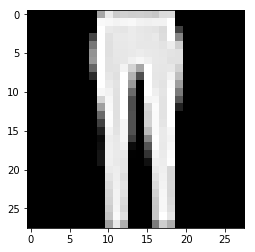

In [23]:
idx = randint(0, len(train_images))
image = train_images[idx]
label_i = train_labels[idx]
print("This is a:", label_map[label_i])
plt.imshow(image, cmap='gray')

## Prepare the data
Neural Networks are fussy with the data that they take in, so we need to do some preprocessing:
1. Apply Feature Scaling to the images
2. One hot encode the labels

### Feature Scaling

In [56]:
# Perform feature scaling with standard scaler 
# np.reshape() is needed to ensure that the np arrays have the correct shape
n_images = len(train_images)
scaler = StandardScaler()
flat_train_images = np.reshape(train_images, (n_images, -1))

# we need to tell the scaler about what data it will be dealing with
scaler.fit(flat_train_images)

# Define a function to scale features
def scale_features(images):
    flat_images = np.reshape(images, (len(images), -1))
    features = scaler.transform(flat_images)
    return features 

# Scale both train and test images
train_features = scale_features(train_images)
test_features = scale_features(test_images)

/Users/zzy/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/zzy/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/zzy/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Before:

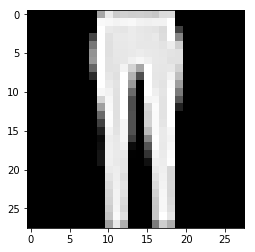

In [69]:
plt.imshow(train_images[idx], cmap='gray')

After scaling:

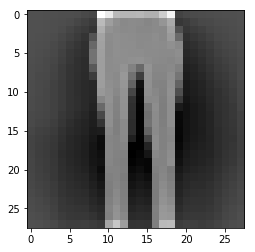

In [65]:
plt.imshow(train_features[idx].reshape(28, 28), cmap='gray')

### One Hot Encoding

In [66]:
# we need to tell the encoder about what data it will be dealing with
encoder = OneHotEncoder()
encoder.fit(np.reshape(train_labels, (len(train_labels), 1)))

# convert labels into one hot encoding
def encode_labels(labels):
    labels = np.reshape(labels, (len(labels), 1))
    features = encoder.transform(labels)
    return features
                        
train_one_hot_labels = encode_labels(train_labels)
test_one_hot_labels = encode_labels(test_labels)

/Users/zzy/.local/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


Before:

In [67]:
train_labels[0]

9

After encoding:

In [68]:
train_one_hot_labels[0].toarray()

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

### Building the Model

In [ ]:
class NNModel:
    def __init__(n_conv